###**Proyecto 02**

Laura Alejandra Palomino Camacho y Lady Tatiana Aguillón Suárez

###Tabla de contenido
######1.Introducción
######2.Desarrollo del proyecto
######2.1.Exploración inicial de los datos
######2.2.Visualización de distribuciones
######2.3.Visualización de proporciones
######2.4.Visualización de relaciones (cuando aplique)
######2.5.Análisis de correlación (cuando aplique)
######3.Conclusión general

##Introducción 
En el proyecto que se muestra a continuación, se desarrolló un análisis de la tenencia de tarjetas de crédito por parte de los individuos, analizando esto por medios de variables como la edad, género, nivel de educación entre otras. Para conseguir este análisis se realizó la visualización de proporciones, relaciones y la correlación que podia existir entre cada una de las variables

##### Instalación de librerías y base de datos

In [ ]:
!pip install wooldridge pingouin missingno

import wooldridge as wd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import scipy.stats as st
import pingouin as pg

import missingno as ms

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer, MissingIndicator
from scipy.spatial.distance import mahalanobis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=c486baf375b931b575ae38ae4f9409790fac517814eb3823c5654ba7cc5f054f
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built littleutils


In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/labeconometria/MLxE/main/proyectos1er/dataset_2.csv')
dataset

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


#### Exploración inicial de los datos

In [ ]:
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
dataset.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
dataset.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
dataset = dataset.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [ ]:
for col in ['Attrition_Flag','Gender','Education_Level','Marital_Status','Card_Category']:
  dataset[col]=dataset[col].str.lower()

In [ ]:
dataset['Attrition_Flag'].value_counts(normalize=True)

existing customer    0.83934
attrited customer    0.16066
Name: Attrition_Flag, dtype: float64

In [ ]:
dataset['Gender'].value_counts(normalize=True)

f    0.529081
m    0.470919
Name: Gender, dtype: float64

In [ ]:
dataset['Marital_Status'].value_counts(normalize=True)

married     0.462822
single      0.389355
unknown     0.073961
divorced    0.073862
Name: Marital_Status, dtype: float64

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

##### Conclusión
Gracias a la exploración inicial de la base de datos se puede observar que es una base con 5 filas y 23 columnas, de las cuales hay 5 categóricas que posteriormente se transformaron a minúsculas, se hizo la eliminación de tres columnas ya que no tenían relevancia dentro del análisis buscado y se buscaron duplicados dentro de la base, de los cuales no se encontró presencia, así como tampoco se encontraron missing values.


#### Visualización de distribuciones y de proporciones

###### Distribución y proporción de variables categóricas 

<AxesSubplot:>

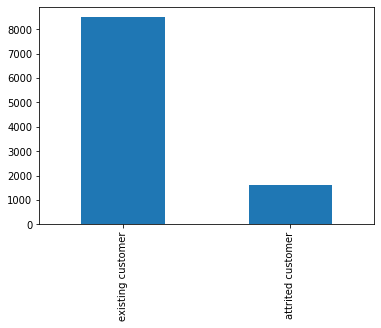

In [ ]:
dataset['Attrition_Flag'].value_counts().plot(kind='bar')

<AxesSubplot:>

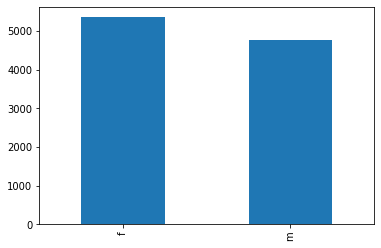

In [ ]:
dataset['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:>

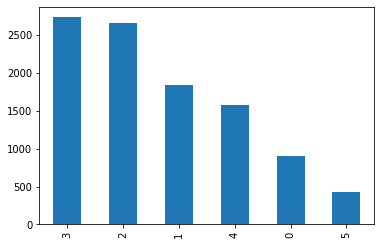

In [ ]:
dataset['Dependent_count'].value_counts().plot(kind='bar')

<AxesSubplot:>

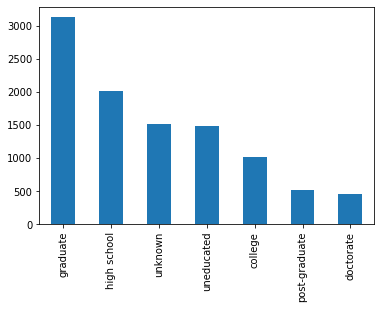

In [ ]:
dataset['Education_Level'].value_counts().plot(kind='bar',stacked=True)

<AxesSubplot:>

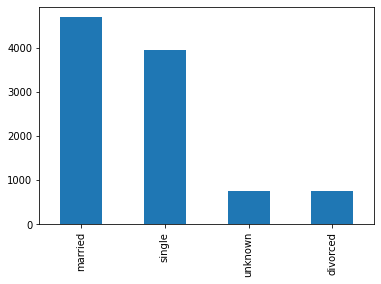

In [ ]:
dataset['Marital_Status'].value_counts().plot(kind='bar')

<AxesSubplot:>

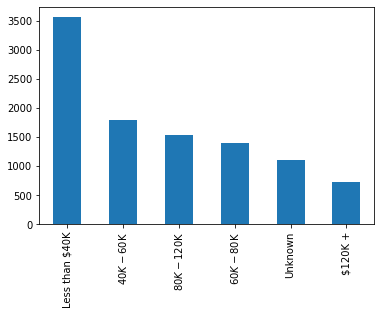

In [ ]:
dataset['Income_Category'].value_counts().plot(kind='bar')

<AxesSubplot:>

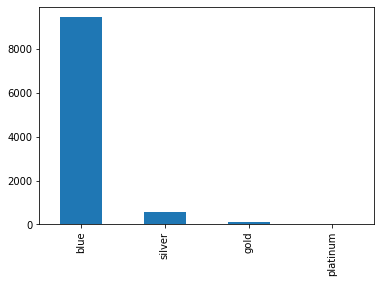

In [ ]:
dataset['Card_Category'].value_counts().plot(kind='bar')

###### Distribución y proporción de variables númericas

<AxesSubplot:>

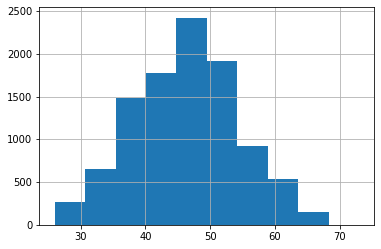

In [ ]:
dataset['Customer_Age'].hist()

<AxesSubplot:>

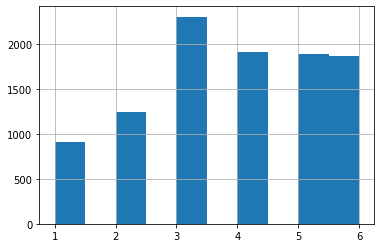

In [ ]:
dataset['Total_Relationship_Count'].hist()

<AxesSubplot:>

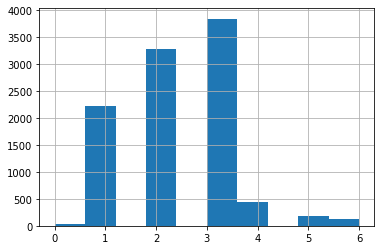

In [ ]:
dataset['Months_Inactive_12_mon'].hist()

<AxesSubplot:>

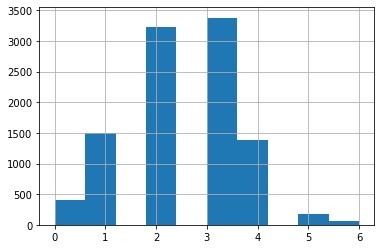

In [ ]:
dataset['Contacts_Count_12_mon'].hist()

<AxesSubplot:>

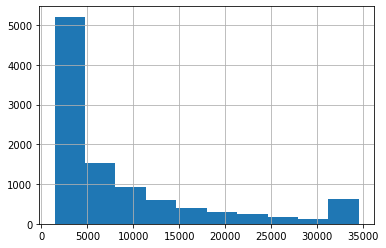

In [ ]:
dataset['Credit_Limit'].hist()

<AxesSubplot:>

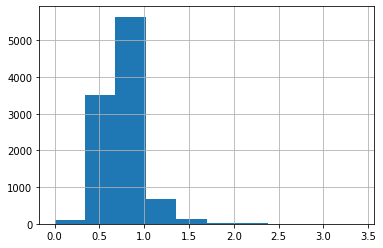

In [ ]:
dataset['Total_Amt_Chng_Q4_Q1'].hist()

<AxesSubplot:>

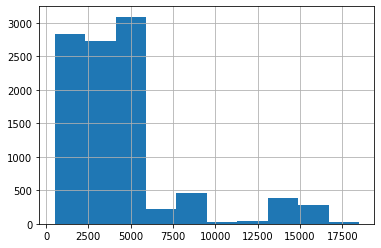

In [ ]:
dataset['Total_Trans_Amt'].hist()

<AxesSubplot:>

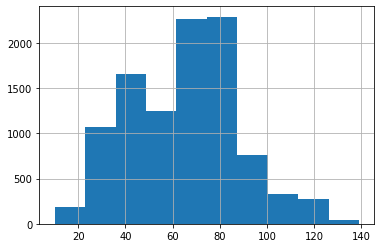

In [ ]:
dataset['Total_Trans_Ct'].hist()

<AxesSubplot:>

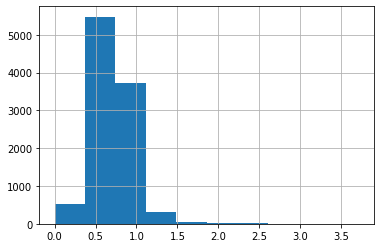

In [ ]:
dataset['Total_Ct_Chng_Q4_Q1'].hist()

<AxesSubplot:>

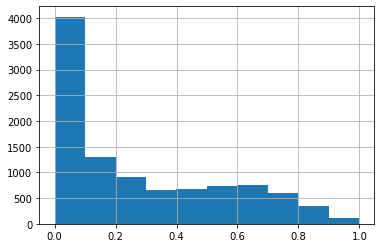

In [ ]:
dataset['Avg_Utilization_Ratio'].hist()

##### Conclusión
Inicialmente se puede observar que en Attrition flag hay una carga positiva de distribución en los clientes existentes en comparación a los individuos que han desertado, para el caso del género existe una distribución relativamente proporcional entre los dos géneros con una leve inclinación mayor en el género femenino, por otro lado se puede evidenciar una tendencia negativa en el uso de tarjetas de crédito cuando se tiene un mayor número de dependent y de forma similar, en cuanto a los niveles educacionales se puede evidenciar que entre más alto es el nivel educativo, más se hace uso de tarjetas de crédito. Sin embargo, se ve una distribución con tendencia negativa y relación inversa entre el ingreso y el uso de tarjetas, ya que entre más ingresos tienen los individuos menos uso hacen de estás. En contraste a todo lo anterior se logra evidenciar una distribución normal en la edad de los clientes, respecto a la cantidad de productos financieros de cada individuo se puede notar que en promedio la gente tiene entre 3 y 6 productos financieros, teniendo así un sesgo hacía la derecha, en cuanto al límite de crédito se evidencia una distribución con sesgo hacía la izquierda ya que la mayoría de individuos tiene un límite medianamente inferior.


#### Visualización de relaciones

<AxesSubplot:title={'center':'Customer_Age'}, xlabel='Attrition_Flag'>

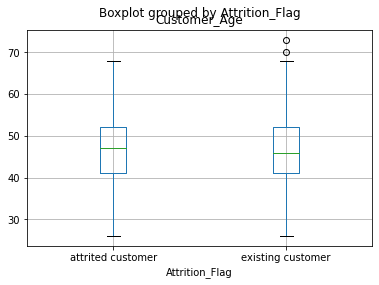

In [ ]:
dataset.boxplot(column='Customer_Age', by='Attrition_Flag')

<AxesSubplot:xlabel='Education_Level'>

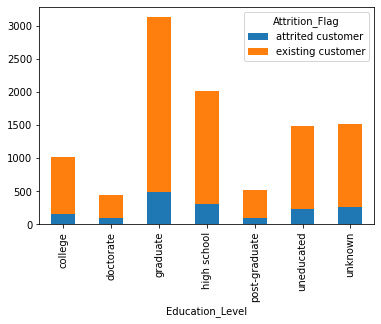

In [ ]:
dataset[['Education_Level','Attrition_Flag']].value_counts().reset_index().pivot_table(columns=['Attrition_Flag'], 
                     index='Education_Level',values=0).plot.bar(stacked=True)

<AxesSubplot:xlabel='Gender'>

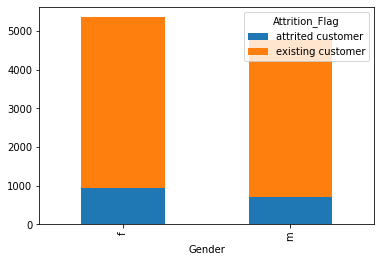

In [ ]:
dataset[['Gender','Attrition_Flag']].value_counts().reset_index().pivot_table(columns=['Attrition_Flag'], 
                     index='Gender',values=0).plot.bar(stacked=True)

<AxesSubplot:xlabel='Dependent_count'>

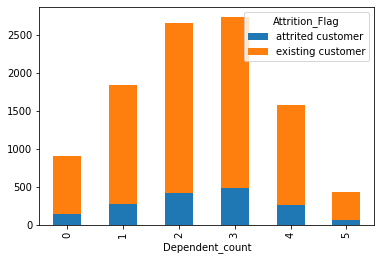

In [ ]:
dataset[['Dependent_count','Attrition_Flag']].value_counts().reset_index().pivot_table(columns=['Attrition_Flag'], 
                     index='Dependent_count',values=0).plot.bar(stacked=True)

<AxesSubplot:xlabel='Marital_Status'>

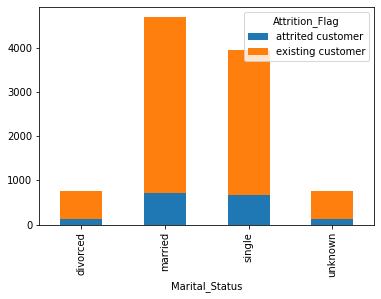

In [ ]:
dataset[['Marital_Status','Attrition_Flag']].value_counts().reset_index().pivot_table(columns=['Attrition_Flag'], 
                     index='Marital_Status',values=0).plot.bar(stacked=True)

<AxesSubplot:xlabel='Income_Category'>

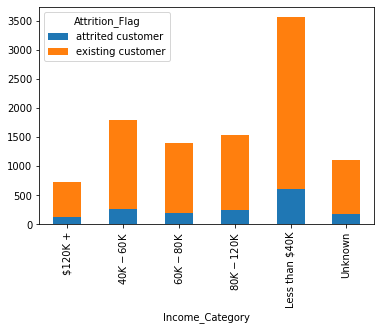

In [ ]:
dataset[['Income_Category','Attrition_Flag']].value_counts().reset_index().pivot_table(columns=['Attrition_Flag'], 
                     index='Income_Category',values=0).plot.bar(stacked=True)

<AxesSubplot:xlabel='Card_Category'>

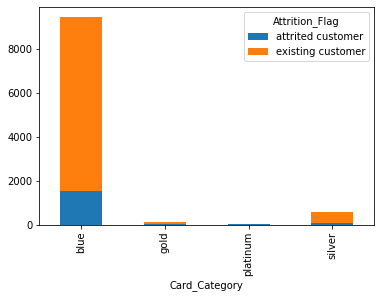

In [ ]:
dataset[['Card_Category','Attrition_Flag']].value_counts().reset_index().pivot_table(columns=['Attrition_Flag'], 
                     index='Card_Category',values=0).plot.bar(stacked=True)

<AxesSubplot:title={'center':'Months_on_book'}, xlabel='Attrition_Flag'>

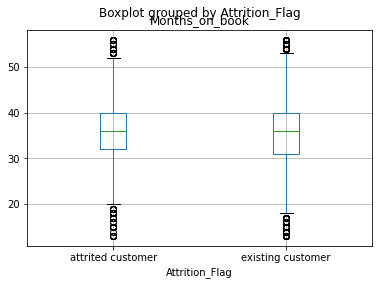

In [ ]:
dataset.boxplot(column='Months_on_book', by='Attrition_Flag')

<AxesSubplot:title={'center':'Total_Relationship_Count'}, xlabel='Attrition_Flag'>

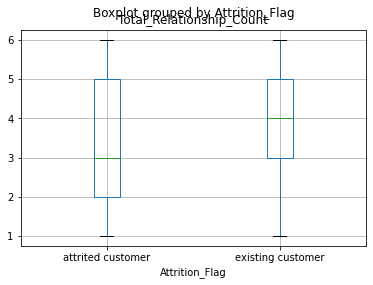

In [ ]:
dataset.boxplot(column='Total_Relationship_Count', by='Attrition_Flag')

<AxesSubplot:title={'center':'Months_Inactive_12_mon'}, xlabel='Attrition_Flag'>

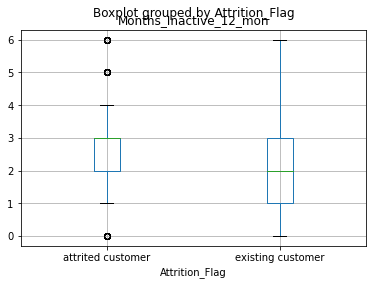

In [ ]:
dataset.boxplot(column='Months_Inactive_12_mon', by='Attrition_Flag')

<AxesSubplot:title={'center':'Contacts_Count_12_mon'}, xlabel='Attrition_Flag'>

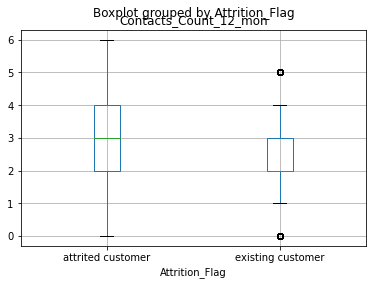

In [ ]:
dataset.boxplot(column='Contacts_Count_12_mon', by='Attrition_Flag')

<AxesSubplot:title={'center':'Credit_Limit'}, xlabel='Attrition_Flag'>

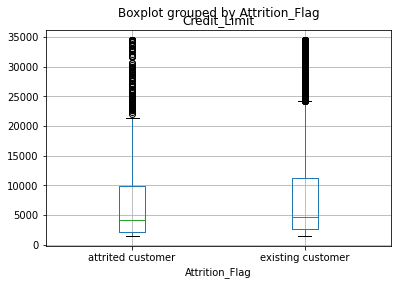

In [ ]:
dataset.boxplot(column='Credit_Limit', by='Attrition_Flag')

<AxesSubplot:title={'center':'Total_Revolving_Bal'}, xlabel='Attrition_Flag'>

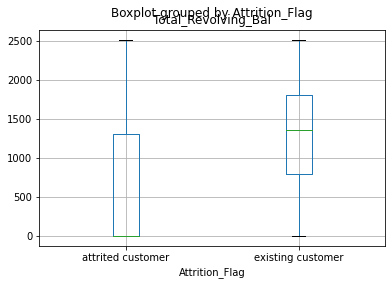

In [ ]:
dataset.boxplot(column='Total_Revolving_Bal', by='Attrition_Flag')

<AxesSubplot:title={'center':'Avg_Open_To_Buy'}, xlabel='Attrition_Flag'>

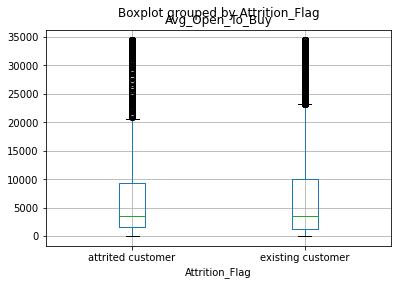

In [ ]:
dataset.boxplot(column='Avg_Open_To_Buy', by='Attrition_Flag')

<AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}, xlabel='Attrition_Flag'>

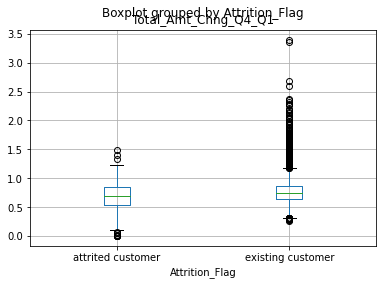

In [ ]:
dataset.boxplot(column='Total_Amt_Chng_Q4_Q1', by='Attrition_Flag')

<AxesSubplot:title={'center':'Total_Trans_Amt'}, xlabel='Attrition_Flag'>

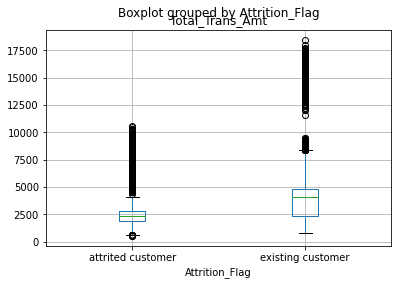

In [ ]:
dataset.boxplot(column='Total_Trans_Amt', by='Attrition_Flag')

<AxesSubplot:title={'center':'Total_Trans_Ct'}, xlabel='Attrition_Flag'>

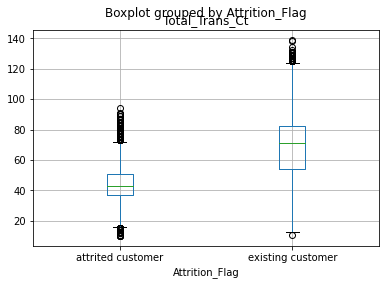

In [ ]:
dataset.boxplot(column='Total_Trans_Ct', by='Attrition_Flag')

<AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}, xlabel='Attrition_Flag'>

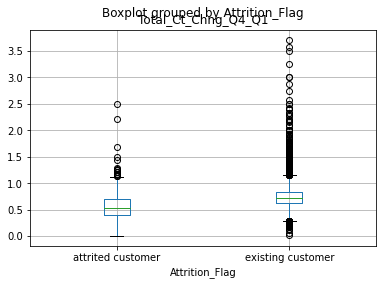

In [ ]:
dataset.boxplot(column='Total_Ct_Chng_Q4_Q1', by='Attrition_Flag')

<AxesSubplot:title={'center':'Avg_Utilization_Ratio'}, xlabel='Attrition_Flag'>

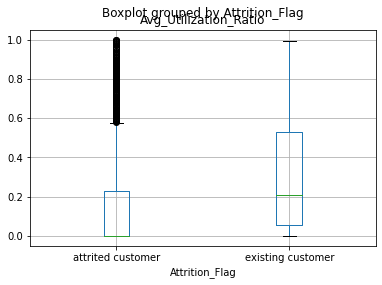

In [ ]:
dataset.boxplot(column='Avg_Utilization_Ratio', by='Attrition_Flag')

##### Conclusión
La relación percibida entre la edad de los clientes y su pertenencia como cliente en la compañía se encuentra que los individuos que los jóvenes en promedio han mantenido su cuenta mientras que las personas levemente mayores la han cerrado, así también se puede ver una relación proporcional con el nivel educativo de los individuos y se puede destacar que los individuos que más tienen sus cuentas existentes son graduadas o se encuentran en el high school, este mismo patrón lo sigue la relación que se encontró respecto al genero de los individuos y su abandono en las cuentas. Analizado el total de transacciones frente a la tenencia de tarjetas de crédito se encuentra que aunque existen datos atípicos la personas que tienen tarjetas de crédito realizan en promedio promedio 45 transacciones para el caso del límite crediticio se encuentra que la personas que ya no tienen esta tarjeta de crédito tienen un límite superior en sus tarjetas frente a las que a un la siguen teniendo

#### Análisis de correlación

In [ ]:
dataset.corr()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


#####Conclusión
Por medio del análisis de correlación que puede evidenciar una relación posiva entre la edad de los clientes y el límite crediticio ya que entre mayor edad el límite crediticio aumenta. Caso contrario a lo que sucede con la dependencia ya que a mayor edad discute la cantidad de personas que dependen de los clientes. Para el caso de la denpendencia esta tienen relación positiva con el total de transacciones

### Conclusión general

Por medio de cada uno de los análisis realizados se puede determinar que lo clientes tienen una distribución proporcional por su género, el uso de tarjetas de crédito crece cuando las personas tienen un mayor nivel de educación y mayor edad, las personas también se caracterizan por tener entre 3 y 4 productos financieros. Por otro lado, los clientes acostumbran a realizar en promedio 45 transacciones. También se evidencia que existe una correlación significativa en cada una de las variables utilizadas para el análisis.